# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ghazi Taqiyya Al Anshari
- Email: taqiyyaghazi@gmail.com
- Id Dicoding: zitaqiy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Menyiapkan Data yang akan digunakan

In [4]:
employee_df = pd.read_csv('/content/employee_data.csv')

## Data Understanding

In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
numerical_columns = ['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

In [7]:
employee_df[numerical_columns].describe()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.169187,36.923810,802.485714,9.192517,2.721769,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,0.375094,9.135373,403.509100,8.106864,1.093082,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,4.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
employee_df[categorical_columns].astype(object).describe()

,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,5,6,2,4,5,9,4,3,1,2,2,4,4
top,Travel_Rarely,Research & Development,3,Life Sciences,Male,3,1,Sales Executive,4,Married,Y,No,3,3,3
freq,1043,961,572,606,882,868,543,326,459,673,1470,1054,1244,459,893


In [9]:
employee_df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [10]:
employee_df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,673
Single,470
Divorced,327


In [11]:
employee_df['Over18'].value_counts()

,count
Over18,
Y,1470


In [12]:
employee_df['OverTime'].value_counts()

,count
OverTime,
No,1054
Yes,416


In [13]:
employee_df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [14]:
employee_df.duplicated().sum()

0

## Data Preparation / Preprocessing

### Drop Missing Value

In [15]:
employee_df.dropna(axis=0, inplace=True)

### Encoding Kategorikal Nominal Columns

In [16]:
categorical_nominal_columns = ['Department', 'EducationField', 'Gender', 'JobRole']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(employee_df[categorical_nominal_columns])

encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_nominal_columns))

encoded_data = employee_df.join(encoded_data)
encoded_data = encoded_data.drop(categorical_nominal_columns, axis=1)

In [17]:
encoded_data.fillna(0, inplace=True)

In [18]:
encoded_data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
1,2,37,1.0,Travel_Rarely,1141,11,2,1,1,61,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,51,1.0,Travel_Rarely,1323,4,4,1,1,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,42,0.0,Travel_Frequently,555,26,3,1,3,77,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,40,0.0,Travel_Rarely,1124,1,2,1,2,57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,8,55,1.0,Travel_Rarely,725,2,3,1,4,78,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,24,2,1,2,72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1465,1466,38,0.0,Travel_Rarely,168,1,3,1,3,81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,1468,28,1.0,Travel_Rarely,1485,12,1,1,3,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,1469,40,0.0,Non-Travel,458,16,2,1,3,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Encoding Kategorikal Ordinal Columns

In [19]:
categorical_ordinal_columns = ['BusinessTravel', 'MaritalStatus', 'Over18', 'OverTime']

In [20]:
business_travel_map = {
  "Non-Travel": 0,
  "Travel_Rarely": 1,
  "Travel_Frequently": 2,
}

marital_status_map = {
  "Single": 0,
  "Married": 1,
  "Divorced": 2
}

over_18_map = {
    "Y": 1,
    "N": 0
}

over_time_map = {
    "No": 0,
    "Yes": 1
}

In [21]:
encoded_data['BusinessTravel'] = encoded_data['BusinessTravel'].map(business_travel_map)
encoded_data['MaritalStatus'] = encoded_data['MaritalStatus'].map(marital_status_map)
encoded_data['Over18'] = encoded_data['Over18'].map(over_18_map)
encoded_data['OverTime'] = encoded_data['OverTime'].map(over_time_map)

In [22]:
encoded_data.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
1,2,37,1.0,1,1141,11,2,1,1,61,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,51,1.0,1,1323,4,4,1,1,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,42,0.0,2,555,26,3,1,3,77,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,40,0.0,1,1124,1,2,1,2,57,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,8,55,1.0,1,725,2,3,1,4,78,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Exploration Data Analysis (EDA)

### Eksplorasi Faktor yang palih berpengaruh terhadap attrition Karyawan

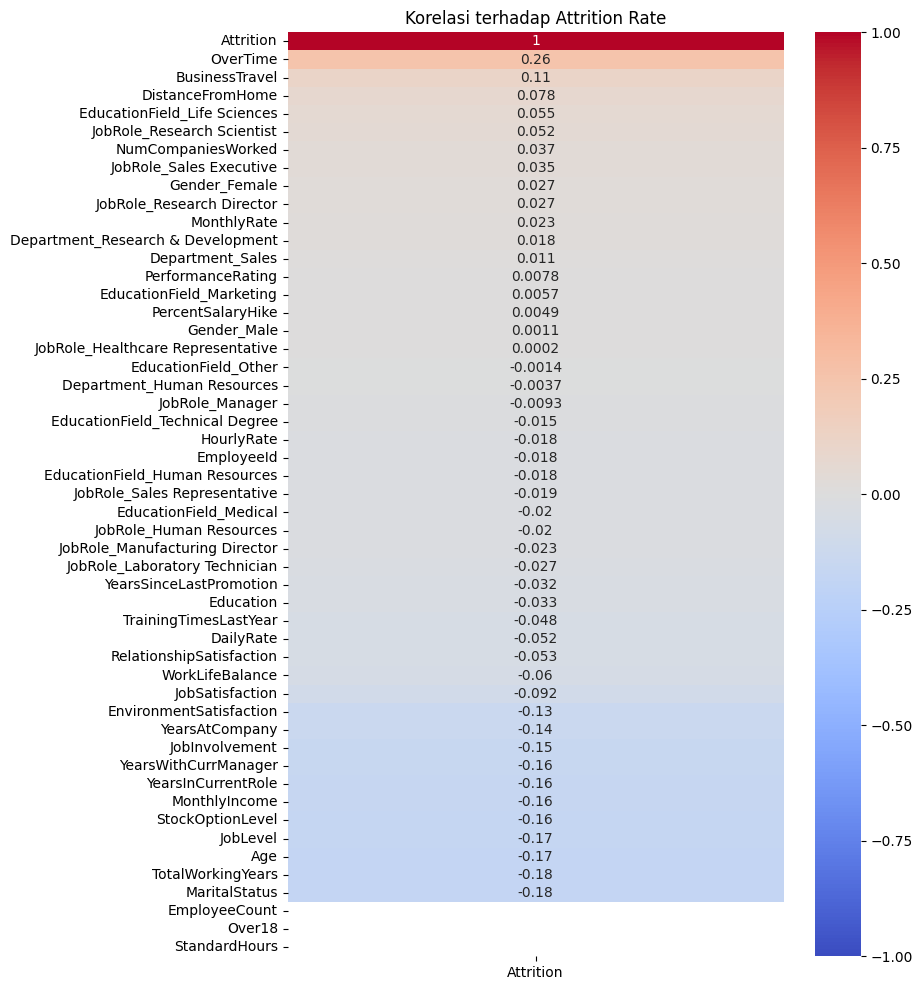

In [23]:
correlation_matrix = encoded_data.corr()

correlation_with_Attrition = correlation_matrix['Attrition'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_Attrition.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi terhadap Attrition Rate')
plt.show()

### Eksplorasi Perbandingan Karyawan yang Overtime

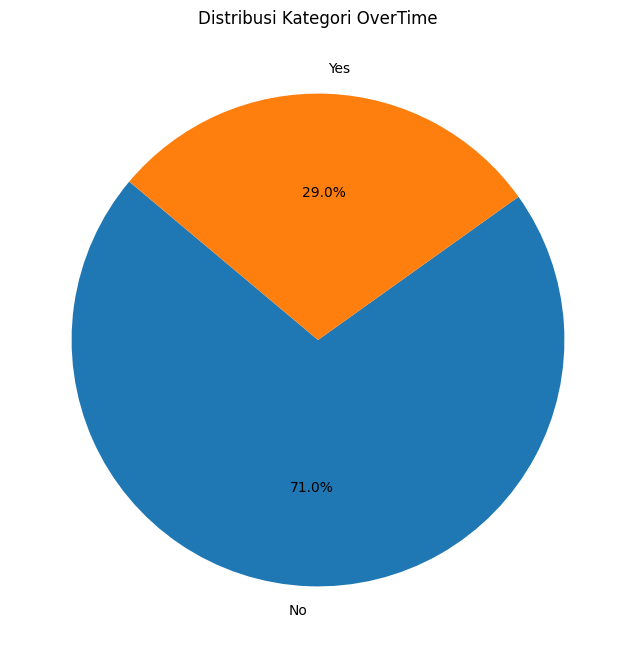

In [24]:
counts = encoded_data['OverTime'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['Yes' if label == 1 else 'No' for label in counts.index], autopct='%1.1f%%', startangle=140)

plt.title('Distribusi Kategori OverTime')

plt.show()

### Eksplorasi Overtime berdasarkan Departement

In [25]:
over_time_employee_df = employee_df[employee_df['OverTime'] == 'Yes']

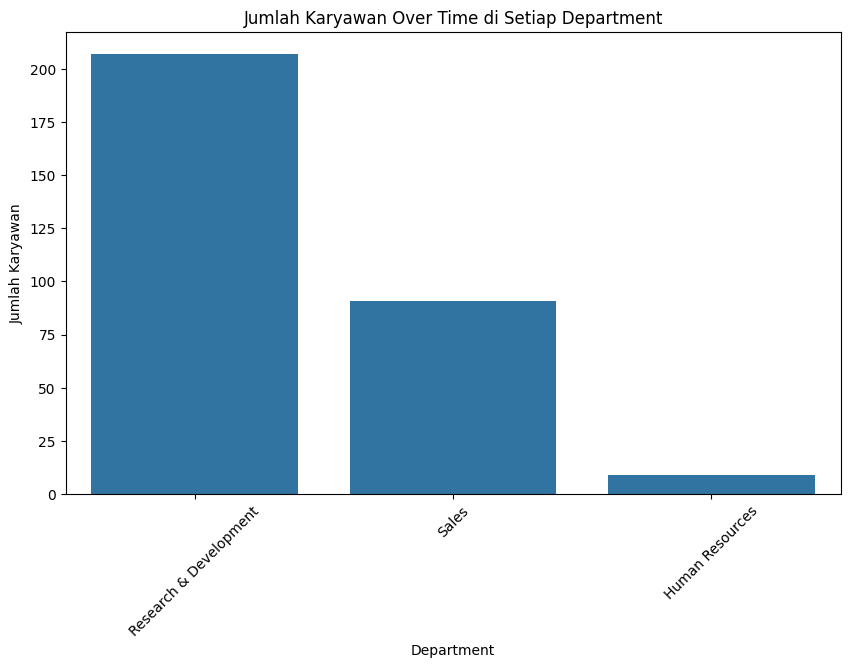

In [26]:
department_counts = over_time_employee_df['Department'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.index, y=department_counts.values)

# Tambahkan title dan label
plt.title('Jumlah Karyawan Over Time di Setiap Department')
plt.xlabel('Department')
plt.ylabel('Jumlah Karyawan')

plt.xticks(rotation=45)  # Rotasi label x-axis agar lebih mudah dibaca
plt.show()

### Eksplorasi Perbandingan Attrition antara karyawan yang Overtime dan tidak Overtime

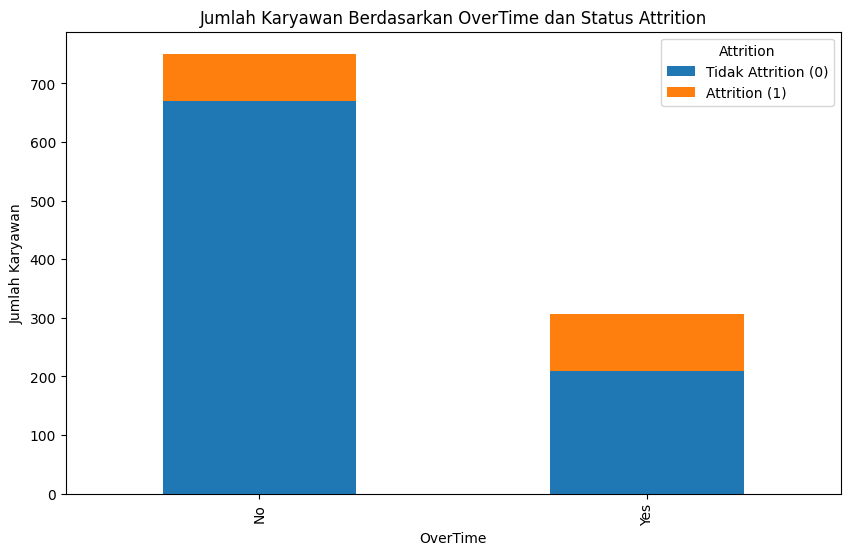

In [27]:
grouped_df = employee_df.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)

ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Jumlah Karyawan Berdasarkan OverTime dan Status Attrition')
plt.xlabel('OverTime')
plt.ylabel('Jumlah Karyawan')

plt.legend(title='Attrition', labels=['Tidak Attrition (0)', 'Attrition (1)'])

plt.show()

### Explorasi Monthly Income Karyawan OverTime Attrition dan Overtime No Attrition

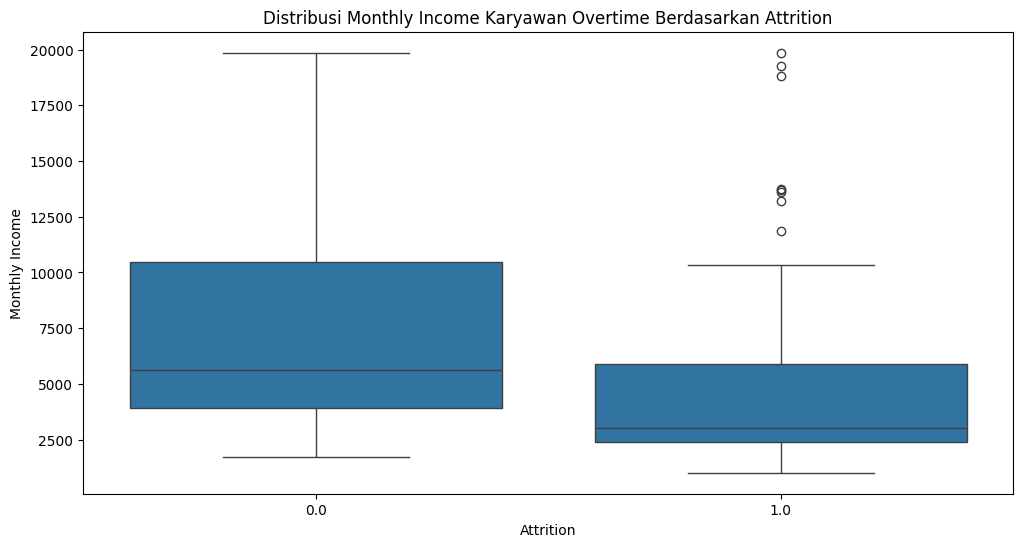

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=over_time_employee_df)

plt.title('Distribusi Monthly Income Karyawan Overtime Berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

plt.show()